In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("tsunami_dataset.csv")
df

,Earthquake_Magnitude,Ocean_Depth,Proximity_to_Plate_Boundary,Seafloor_Displacement,Coastal_Population_Density,Wave_Energy,Distance_from_Epicenter,Tsunami
0,8.249080,143.592860,0.731994,6.387926,240.416776,162.397808,29.041806,1
1,9.232352,98.144952,0.708073,1.185260,972.918867,432.977056,106.169555,1
2,7.863650,43.842586,0.304242,5.722808,488.750517,216.491656,305.926447,1
3,7.778988,57.978804,0.366362,5.104630,806.658365,179.869513,257.117219,1
4,8.684829,26.038554,0.607545,2.534717,158.546434,479.554215,482.816017,1
...,...,...,...,...,...,...,...,...
1995,6.529545,4823.371784,2.861422,0.762233,156.122629,40.853511,1226.900721,0
1996,6.678732,4488.779142,2.579424,0.195267,179.905894,66.434692,315.649635,0
1997,4.700773,654.781185,2.685438,0.258506,85.409391,191.987314,944.447429,0
1998,4.033550,1490.846127,1.238599,0.102809,23.246187,118.651894,621.891130,0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Earthquake_Magnitude         2000 non-null   float64
 1   Ocean_Depth                  2000 non-null   float64
 2   Proximity_to_Plate_Boundary  2000 non-null   float64
 3   Seafloor_Displacement        2000 non-null   float64
 4   Coastal_Population_Density   2000 non-null   float64
 5   Wave_Energy                  2000 non-null   float64
 6   Distance_from_Epicenter      2000 non-null   float64
 7   Tsunami                      2000 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 125.1 KB
None


 thallium_scint, num_major_vessels, st_slope, st_depression, max_heart_rate, exer_ind_angina, chest_pain_type and sex.

In [6]:
# Number of null values
print(df.isnull().sum())

# Actual null values
df[df.isnull().any(axis=1)]

Earthquake_Magnitude           0
Ocean_Depth                    0
Proximity_to_Plate_Boundary    0
Seafloor_Displacement          0
Coastal_Population_Density     0
Wave_Energy                    0
Distance_from_Epicenter        0
Tsunami                        0
dtype: int64


,Earthquake_Magnitude,Ocean_Depth,Proximity_to_Plate_Boundary,Seafloor_Displacement,Coastal_Population_Density,Wave_Energy,Distance_from_Epicenter,Tsunami


In [7]:
print(df.nunique())

Earthquake_Magnitude           2000
Ocean_Depth                    2000
Proximity_to_Plate_Boundary    2000
Seafloor_Displacement          2000
Coastal_Population_Density     2000
Wave_Energy                    2000
Distance_from_Epicenter        2000
Tsunami                           2
dtype: int64


Tsunami
1    1000
0    1000
Name: count, dtype: int64


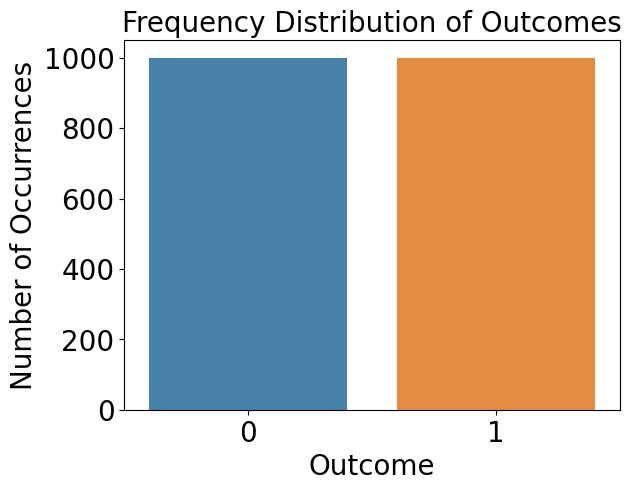

In [8]:
#outcome_counts = df_fin_cat.groupby('ca_disease').size()
outcome_counts = df['Tsunami'].value_counts()
print(outcome_counts)

# Plot outcome counts.
ax = sns.barplot(x=outcome_counts.index, y=outcome_counts.values, alpha=0.9)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
#ax.title.set_size(45)
ax.tick_params('y', labelsize = 20);
ax.tick_params('x', labelsize = 20);
plt.title('Frequency Distribution of Outcomes', fontsize=20)
plt.ylabel('Number of Occurrences')
plt.xlabel('Outcome')
plt.show();

In [9]:
df.describe()

,Earthquake_Magnitude,Ocean_Depth,Proximity_to_Plate_Boundary,Seafloor_Displacement,Coastal_Population_Density,Wave_Energy,Distance_from_Epicenter,Tsunami
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.112659,1326.112979,1.250109,2.943455,348.753501,196.678171,696.693465,0.500000
std,1.617636,1592.388443,0.880447,3.115970,281.685771,130.988875,576.921837,0.500125
min,4.000844,20.122644,0.000598,0.000053,0.047323,0.048587,0.556047,0.000000
25%,5.699312,86.647125,0.502694,0.480656,134.173944,99.224923,243.019408,0.000000
50%,7.498114,148.165540,1.000020,1.005935,250.633588,168.445967,454.918151,0.500000
75%,8.505587,2577.400523,2.011534,5.294924,560.672746,289.433653,1129.586384,1.000000
max,9.497785,4998.398706,2.997500,9.992866,998.140699,499.784272,1997.639426,1.000000


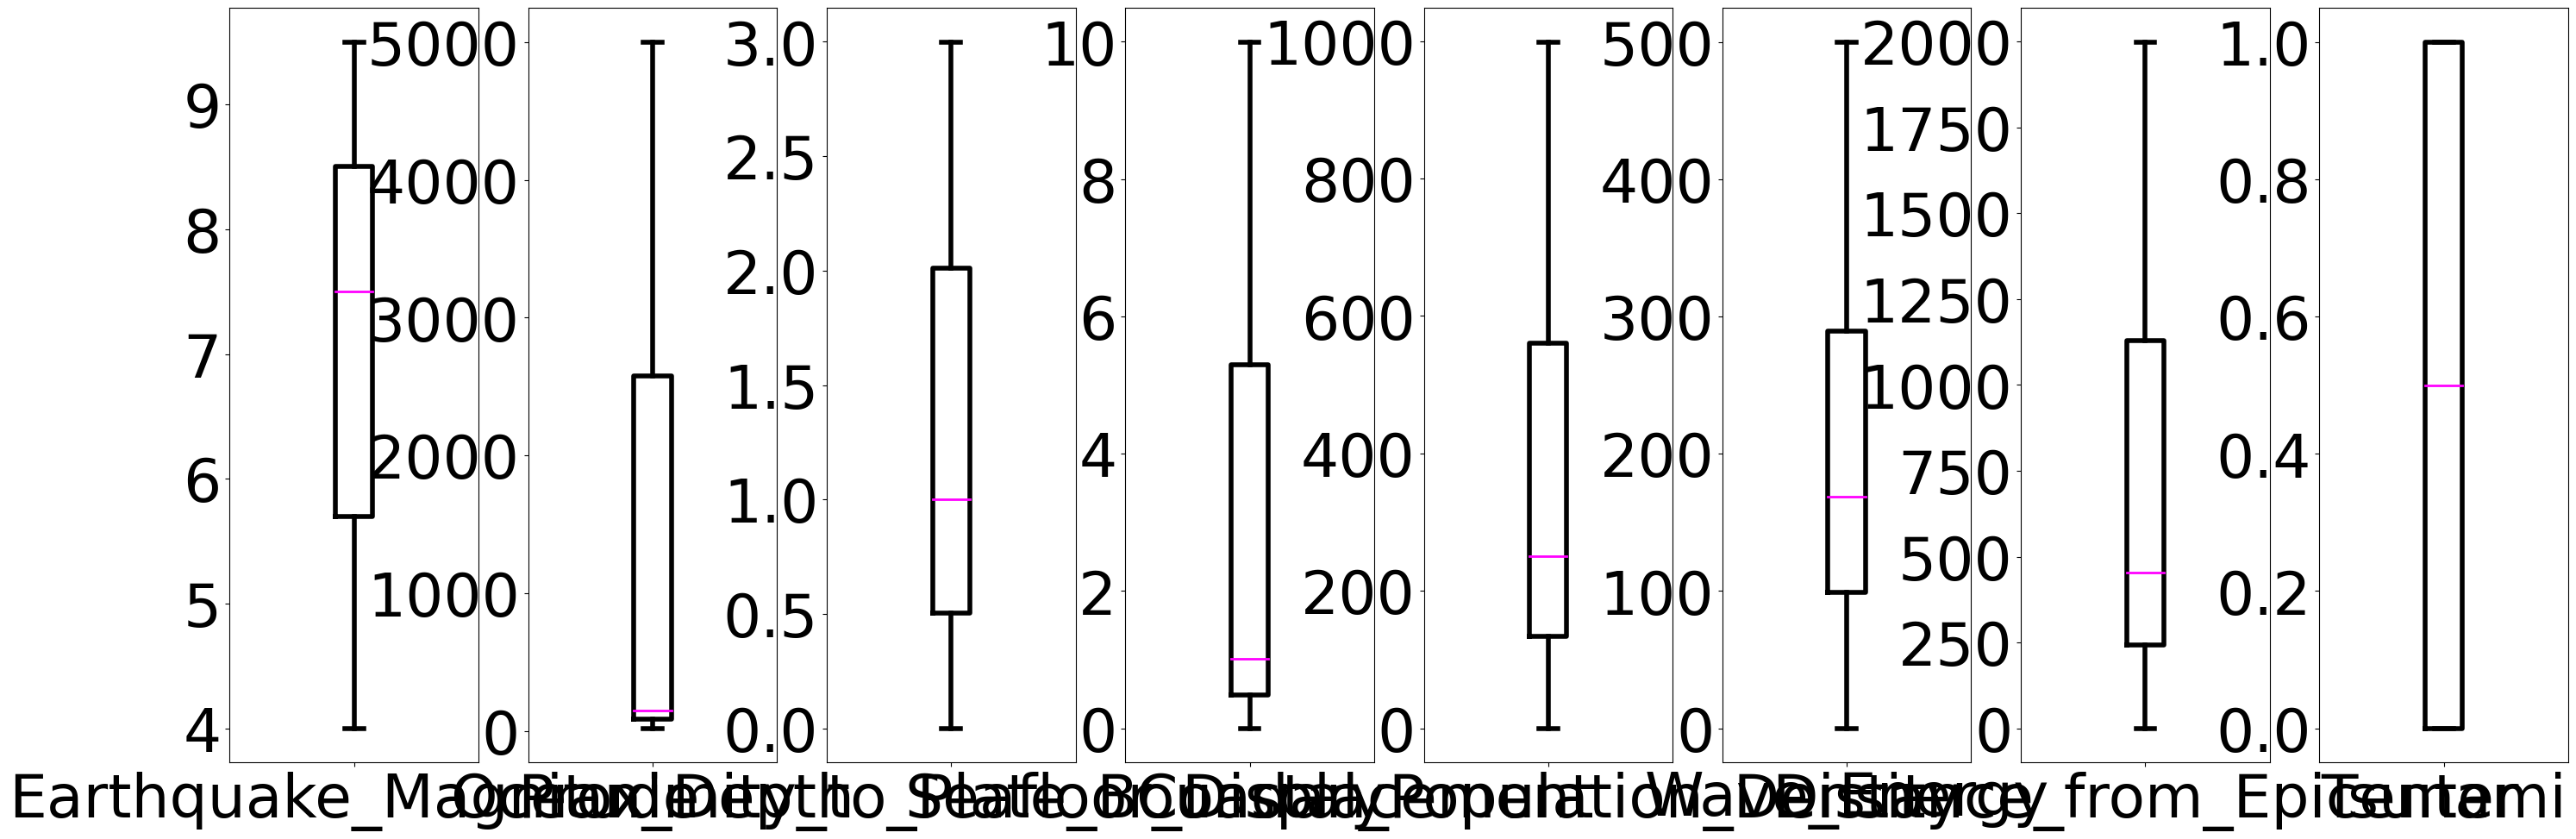

In [11]:
# Boxplot of continuous variables
medianprops = {'color': 'magenta', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-', 'linewidth': 4}
whiskerprops = {'color': 'black', 'linestyle': '-', 'linewidth': 4}
capprops = {'color': 'black', 'linestyle': '-', 'linewidth': 4}
flierprops = {'color': 'black', 'marker': 'x', 'markersize': 25}

_ = df.plot(kind='box', subplots=True, figsize=(35, 25), layout=(2,8), fontsize = 50, medianprops=medianprops,
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops);

_ = plt.tight_layout();
_ = plt.show();

In [12]:
X = df.drop('Tsunami',axis=1)
y=df['Tsunami']

print(X.shape)

(2000, 7)


# Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train=scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

# K-Neighbors Classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# model
knn_model=KNeighborsClassifier()

knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Train accuracy:' , accuracy_score(y_train,train_prediction))
print('Test accuracy:' , accuracy_score(y_test,test_prediction))

# cross validation score
print('*'*20)

from sklearn.model_selection import cross_val_score
score= cross_val_score(knn_model,X,y,cv=5)
print(score.mean())


********************
Train accuracy: 0.998125
Test accuracy: 1.0
********************
0.998


# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
# modeling

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
# prediction
train_pred=dtc.predict(X_train)
test_pred= dtc.predict(X_test)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))



Train accuracy: 1.0
Test accuracy: 1.0


# Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)


train accuracy: 1.0
test accuracy: 1.0


# Gradient Boosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)

# evaluation
from sklearn.metrics import accuracy_score
print('train accuracy:',accuracy_score(y_test,test_prediction))
print('test accuracy:',accuracy_score(y_train,train_prediction))

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score)

print('*'*10)
print('cv_score :',score.mean())


print('*'*10)
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prediction))

train accuracy: 0.9975
test accuracy: 1.0
[1. 1. 1. 1. 1.]
**********
cv_score : 1.0
**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       0.99      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
train_prediction = log_model.predict(X_train)

test_prediction = log_model.predict(X_test)

print('train',accuracy_score(y_train,train_prediction))
print('test',accuracy_score(y_test,test_prediction))

from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))



train 1.0
test 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



# SVM

In [23]:
from sklearn.svm  import SVC
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

model1=SVC(C= 1.0, kernel='rbf')
model1.fit(X_train,y_train)

#prediction
pred_train=model1.predict(X_train)
pred_test=model1.predict(X_test)
print('train:',accuracy_score(y_train,pred_train))
print('test:',accuracy_score(y_test,pred_test))


print('*'*10)
#cross_val_score
score= cross_val_score(model1,X,y,cv=5)
print('cross_val_score =',score)
print('cross_val_score mean =',score.mean())


print('*'*50)
#cLAssification Report
print(classification_report(y_test,pred_test))

train: 0.998125
test: 0.995
**********
cross_val_score = [0.9925 0.9975 1.     0.995  1.    ]
cross_val_score mean = 0.9970000000000001
**************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       205
           1       0.99      1.00      0.99       195

    accuracy                           0.99       400
   macro avg       0.99      1.00      0.99       400
weighted avg       1.00      0.99      1.00       400



# final model 

In [24]:
from sklearn.tree import DecisionTreeClassifier
# modeling

dtcf=DecisionTreeClassifier(random_state=42)
dtcf.fit(X_train,y_train)
# prediction
train_pred=dtcf.predict(X_train)
test_pred= dtcf.predict(X_test)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))



Train accuracy: 1.0
Test accuracy: 1.0


In [25]:
#save the model

import pickle

# Assume you have a trained model object called 'model'
model = dtcf

# Save the model to a file
with open('dtcf.pkl', 'wb') as file:
    pickle.dump(model, file)


In [26]:
import pickle

# Load the model from the file
with open('dtcf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [27]:
loaded_model.predict([[8.6848291377,26.0385536536,0.6075448519,2.5347171132,158.5464336868,479.5542149013,482.8160165373]])

array([1], dtype=int64)

In [28]:
loaded_model.predict([[7.1154029771,4309.3270155626,1.1534547439,0.1063884054,148.551477674,121.8445325539,767.3441737198]])


array([0], dtype=int64)